<a href="https://colab.research.google.com/github/CakeNuthep/histogram-equalizer/blob/master/HE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Thank you source code from https://github.com/torywalker/histogram-equalizer

## Thank you image from https://www.freeimages.com/download/the-moon-and-sea-1198144

In [1]:
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/sunset-1381672.jpg').convert("L")

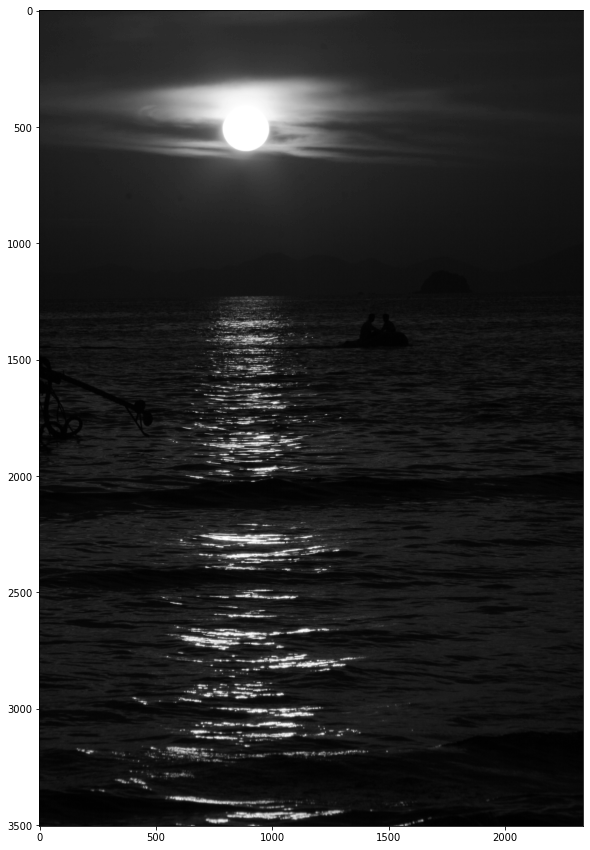

In [2]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.imshow(img, cmap='gray')

In [3]:
# convert image into a numpy array
img = np.asarray(img)

(array([  1832.,  21667.,  60496.,  87300., 100967., 110636., 123679.,
        156695., 182383., 177971., 169325., 166653., 176728., 184144.,
        182455., 180629., 193953., 206255., 218181., 224678., 215882.,
        207847., 205927., 210062., 218187., 229865., 248177., 255666.,
        252524., 242976., 223817., 203173., 180342., 162328., 147285.,
        128996., 114021., 104480.,  92951.,  83719.,  75970.,  69960.,
         66968.,  63362.,  62776.,  62444.,  58632.,  56585.,  49589.,
         41598.,  37017.,  33214.,  31291.,  28975.,  26404.,  24660.,
         22707.,  20300.,  19179.,  16862.,  15227.,  13691.,  12420.,
         11782.,  11059.,  10432.,  10049.,   9693.,   9195.,   8766.,
          8535.,   8204.,   8001.,   7399.,   7183.,   6926.,   6424.,
          6387.,   6048.,   5956.,   5823.,   5584.,   5473.,   5376.,
          5168.,   5234.,   5021.,   4886.,   4657.,   4673.,   4450.,
          4424.,   4232.,   4157.,   4209.,   4162.,   4243.,   4144.,
      

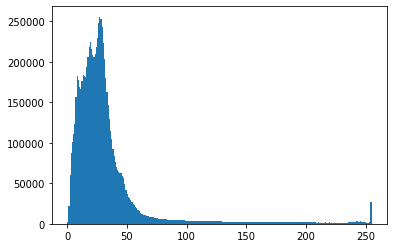

In [4]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=256)

<BarContainer object of 256 artists>

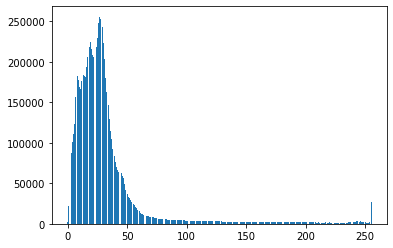

In [5]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.bar(range(len(hist)),hist)

In [6]:
display(Math(r'cdf(i) = \sum_{j=0}^{i} h(j)'))

<IPython.core.display.Math object>

<BarContainer object of 256 artists>

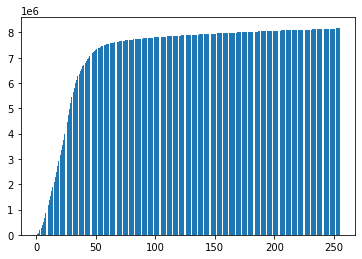

In [7]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)
# display the result
# plt.plot(cs)
plt.bar(range(len(cs)),cs)

In [8]:
display(Math(r'h(v) = round({\frac{cdf(v)-cdf_{min}}{(M \times N)-cdf_{min}}} \times (L-1))'))

<IPython.core.display.Math object>

In [9]:
row = img.shape[0]
col = img.shape[1]
L = 256

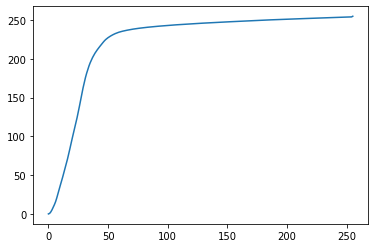

In [10]:
# re-normalize cumsum values to be between 0-255
isValue = cs > 0
csmin = cs[isValue].min()
# numerator & denomenator
nj = (cs[isValue] - csmin) * (L-1)
N = (row * col) - csmin
# re-normalize the cdf
cs = nj / N

plt.plot(cs)

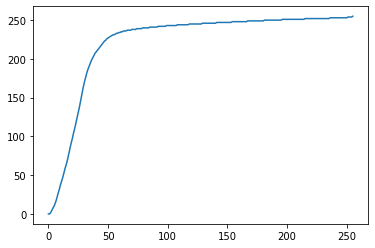

In [11]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([ 23499.,      0.,  60496.,      0.,      0.,  87300.,      0.,
             0., 100967.,      0.,      0., 110636.,      0.,      0.,
             0., 123679.,      0.,      0.,      0.,      0., 156695.,
             0.,      0.,      0.,      0.,      0., 182383.,      0.,
             0.,      0.,      0., 177971.,      0.,      0.,      0.,
             0.,      0., 169325.,      0.,      0.,      0.,      0.,
        166653.,      0.,      0.,      0.,      0., 176728.,      0.,
             0.,      0.,      0.,      0., 184144.,      0.,      0.,
             0.,      0.,      0., 182455.,      0.,      0.,      0.,
             0., 180629.,      0.,      0.,      0.,      0.,      0.,
        193953.,      0.,      0.,      0.,      0.,      0.,      0.,
        206255.,      0.,      0.,      0.,      0.,      0.,      0.,
        218181.,      0.,      0.,      0.,      0.,      0.,      0.,
        224678.,      0.,      0.,      0.,      0.,      0., 215882.,
      

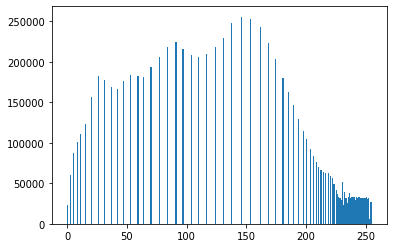

In [12]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=256)

In [13]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[186, 186, 169, ..., 138, 124, 117],
       [186, 190, 175, ..., 131, 124, 117],
       [186, 186, 181, ..., 131, 131, 124],
       ...,
       [ 42,  47,  42, ...,   8,   8,  15],
       [ 42,  47,  42, ...,  11,   8,   8],
       [ 31,  42,  42, ...,  15,  11,   8]], dtype=uint8)

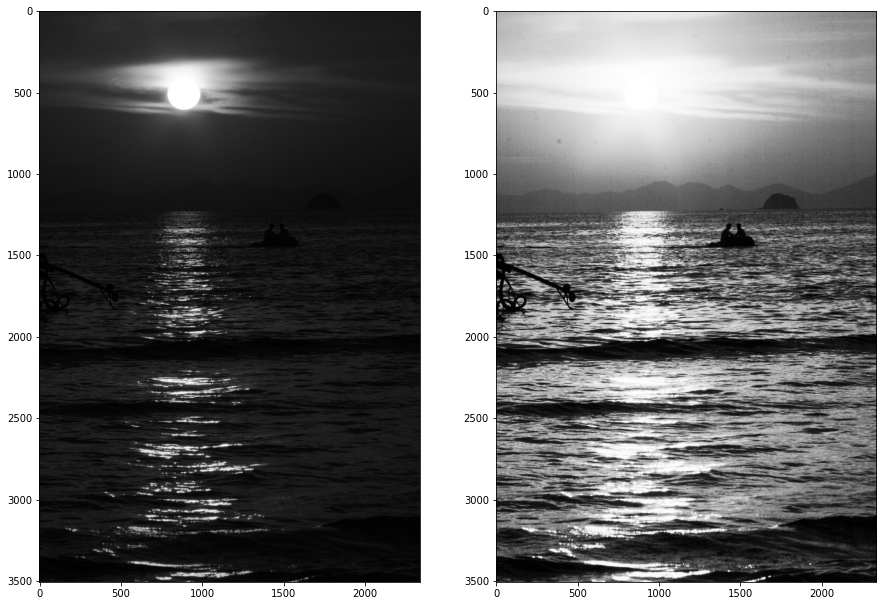

In [14]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

# Use OpenCV

In [15]:
import cv2 as cv
img = Image.open('/content/sunset-1381672.jpg').convert("L")
img = np.asarray(img)
img_new = cv.equalizeHist(img)

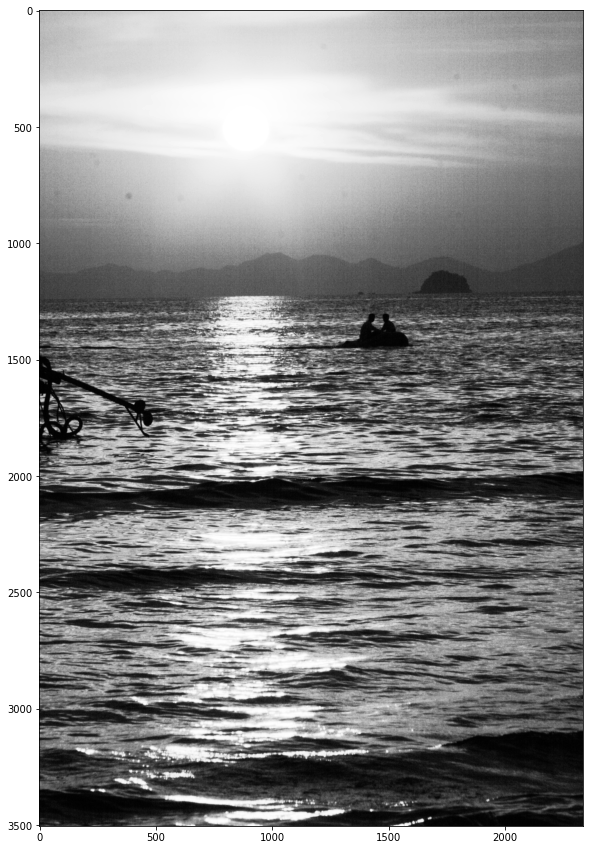

In [16]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.imshow(img_new, cmap='gray')